<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(2_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.666633,54.519315,97.817156,193.003104,105.738524,87.264580
1,0.0,1.0,76.057437,84.436829,-404.331588,-233.837322,87.247932,-321.085253
2,0.0,2.0,49.215922,95.703244,-65.434463,89.484703,85.466922,4.017781
3,0.0,3.0,95.698592,20.888248,38.785540,165.372380,112.835093,52.537287
4,0.0,4.0,44.014707,71.933483,117.117261,243.065451,96.517608,146.547843
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.528366,81.903859,-373.841932,-243.409707,109.528915,-352.938622
119996,999.0,116.0,86.648776,71.465802,222.549914,390.664492,165.274166,225.390326
119997,999.0,117.0,86.727979,23.708879,-56.437868,63.998990,141.321457,-77.322467
119998,999.0,118.0,96.915615,57.673706,114.706277,279.295598,171.342995,107.952604


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    30.666633  54.519315   97.817156  193.003104  105.738524   
      1.0    76.057437  84.436829 -404.331588 -233.837322   87.247932   
      2.0    49.215922  95.703244  -65.434463   89.484703   85.466922   
      3.0    95.698592  20.888248   38.785540  165.372380  112.835093   
      4.0    44.014707  71.933483  117.117261  243.065451   96.517608   
...                ...        ...         ...         ...         ...   
999.0 115.0  38.528366  81.903859 -373.841932 -243.409707  109.528915   
      116.0  86.648776  71.465802  222.549914  390.664492  165.274166   
      117.0  86.727979  23.708879  -56.437868   63.998990  141.321457   
      118.0  96.915615  57.673706  114.706277  279.295598  171.342995   
      119.0  43.853662  92.727698 -650.122256 -503.540896  121.731320   

                  e_hat  
rep   index              
0.0   0.0     87.264580  
      1.0   -321.085253  
      2.0      4.017781  
      3.0     52.537287  
      4.0    146.547843  
...                 ...  
999.0 115.0 -352.938622  
      116.0  225.390326  
      117.0  -77.322467  
      118.0  107.952604  
      119.0 -625.272216  

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    30.666633  54.519315   97.817156  193.003104  105.738524   
      1.0    76.057437  84.436829 -404.331588 -233.837322   87.247932   
      2.0    49.215922  95.703244  -65.434463   89.484703   85.466922   
      3.0    95.698592  20.888248   38.785540  165.372380  112.835093   
      4.0    44.014707  71.933483  117.117261  243.065451   96.517608   
...                ...        ...         ...         ...         ...   
999.0 115.0  38.528366  81.903859 -373.841932 -243.409707  109.528915   
      116.0  86.648776  71.465802  222.549914  390.664492  165.274166   
      117.0  86.727979  23.708879  -56.437868   63.998990  141.321457   
      118.0  96.915615  57.673706  114.706277  279.295598  171.342995   
      119.0  43.853662  92.727698 -650.122256 -503.540896  121.731320   

                  e_hat  
rep   index              
0.0   0.0     87.264580  
      1.0   -321.085253  
      2.0      4.017781  
      3.0     52.537287  
      4.0    146.547843  
...                 ...  
999.0 115.0 -352.938622  
      116.0  225.390326  
      117.0  -77.322467  
      118.0  107.952604  
      119.0 -625.272216  

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.666633,54.519315,97.817156,193.003104,105.738524,87.264580
1,0.0,1.0,76.057437,84.436829,-404.331588,-233.837322,87.247932,-321.085253
2,0.0,2.0,49.215922,95.703244,-65.434463,89.484703,85.466922,4.017781
3,0.0,3.0,95.698592,20.888248,38.785540,165.372380,112.835093,52.537287
4,0.0,4.0,44.014707,71.933483,117.117261,243.065451,96.517608,146.547843
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.528366,81.903859,-373.841932,-243.409707,109.528915,-352.938622
119996,999.0,116.0,86.648776,71.465802,222.549914,390.664492,165.274166,225.390326
119997,999.0,117.0,86.727979,23.708879,-56.437868,63.998990,141.321457,-77.322467
119998,999.0,118.0,96.915615,57.673706,114.706277,279.295598,171.342995,107.952604


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    30.666633  54.519315   97.817156  193.003104  105.738524   
      1.0    76.057437  84.436829 -404.331588 -233.837322   87.247932   
      2.0    49.215922  95.703244  -65.434463   89.484703   85.466922   
      3.0    95.698592  20.888248   38.785540  165.372380  112.835093   
      4.0    44.014707  71.933483  117.117261  243.065451   96.517608   
...                ...        ...         ...         ...         ...   
999.0 115.0  38.528366  81.903859 -373.841932 -243.409707  109.528915   
      116.0  86.648776  71.465802  222.549914  390.664492  165.274166   
      117.0  86.727979  23.708879  -56.437868   63.998990  141.321457   
      118.0  96.915615  57.673706  114.706277  279.295598  171.342995   
      119.0  43.853662  92.727698 -650.122256 -503.540896  121.731320   

                  e_hat  
rep   index              
0.0   0.0     87.264580  
      1.0   -321.085253  
      2.0      4.017781  
      3.0     52.537287  
      4.0    146.547843  
...                 ...  
999.0 115.0 -352.938622  
      116.0  225.390326  
      117.0  -77.322467  
      118.0  107.952604  
      119.0 -625.272216  

[120000 rows x 6 columns]

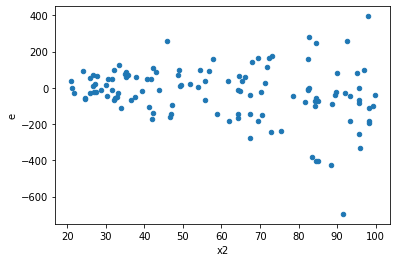

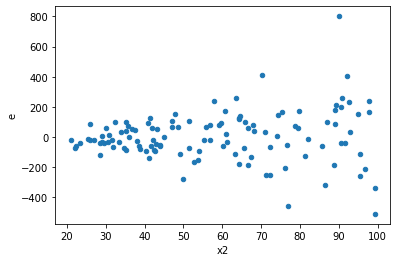

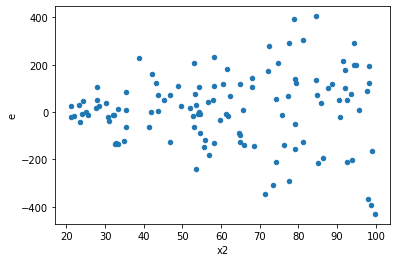

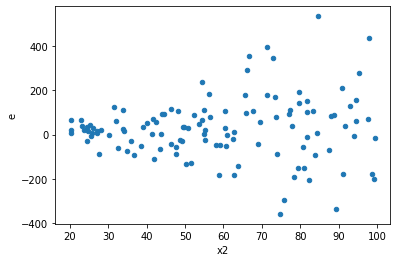

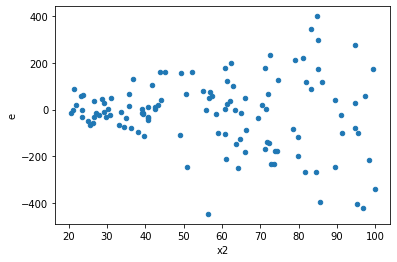

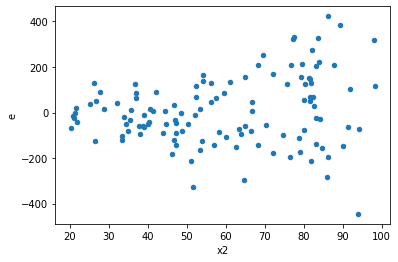

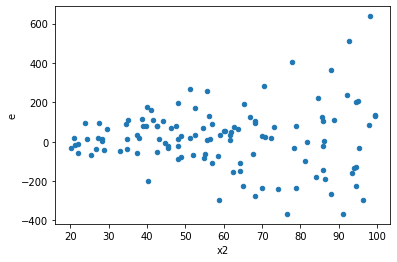

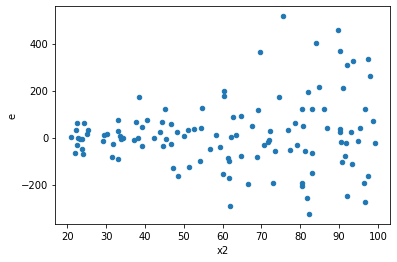

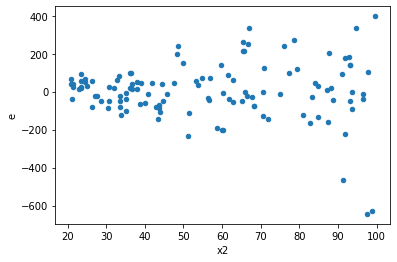

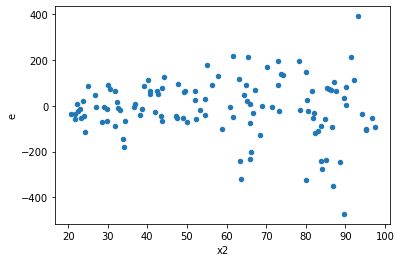

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,59.0,57.0,380653.007674693,2085781.9868720253,6451.745892791407,36592.66643635132,5.67174638375585,5.719640316925734e-10,0.999999999714018,2.859820158462867e-10,Reject001=0 : Heteroscedasticity
1.0,64.0,52.0,502693.2258418491,2522294.5133869722,7854.581653778892,48505.663718980235,6.175461133011945,3.137281545662063e-10,0.9999999998431359,1.5686407728310314e-10,Reject001=0 : Heteroscedasticity
2.0,56.0,60.0,573256.2751097151,2148374.9667923613,10236.71919838777,35806.249446539354,3.497824718311962,3.5449759971939443e-06,0.9999982275120014,1.7724879985969721e-06,Reject001=0 : Heteroscedasticity
4.0,51.0,65.0,270868.9289374455,2353816.6308919475,5311.155469361676,36212.563552183805,6.818208158484961,2.4649171592727726e-12,0.9999999999987675,1.2324585796363863e-12,Reject001=0 : Heteroscedasticity
7.0,57.0,59.0,382063.1139846758,2058497.5892699775,6702.861648853961,34889.78964864369,5.205208085207765,2.3363004864052073e-09,0.9999999988318498,1.1681502432026036e-09,Reject001=0 : Heteroscedasticity
8.0,55.0,61.0,327639.84515584045,2357506.2733350196,5957.088093742554,38647.643825164254,6.487673711886269,1.529509852105093e-11,0.9999999999923525,7.647549260525466e-12,Reject001=0 : Heteroscedasticity
9.0,58.0,58.0,815423.0067220754,962725.1183828674,14059.017357277162,16598.708937635645,1.1806450277297582,0.5291775737033177,0.7354112131483411,0.2645887868516589,Reject001=1 : Homoscedasticity
11.0,58.0,58.0,868361.0780461933,1221274.4988861885,14971.742724934367,21056.45687734808,1.4064132188352432,0.1970621198612399,0.90146894006938,0.09853105993061995,Reject001=1 : Homoscedasticity
12.0,57.0,59.0,292125.25462740846,2562032.93287945,5125.004467147517,43424.28699795678,8.473024223942957,5.3512749786932545e-14,0.9999999999999732,2.6756374893466273e-14,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,57.0,380653.007674693,2085781.9868720253,6451.745892791407,36592.66643635132,5.67174638375585,5.719640316925734e-10,Reject001=0 : Heteroscedasticity
1.0,64.0,52.0,502693.2258418491,2522294.5133869722,7854.581653778892,48505.663718980235,6.175461133011945,3.137281545662063e-10,Reject001=0 : Heteroscedasticity
2.0,56.0,60.0,573256.2751097151,2148374.9667923613,10236.71919838777,35806.249446539354,3.497824718311962,3.5449759971939443e-06,Reject001=0 : Heteroscedasticity
3.0,62.0,54.0,1833759.011241641,454303.0832847558,29576.758245832916,8413.020060828812,0.28444699689203184,2.861276392286251e-06,Reject001=0 : Heteroscedasticity
4.0,51.0,65.0,270868.9289374455,2353816.6308919475,5311.155469361676,36212.563552183805,6.818208158484961,2.4649171592727726e-12,Reject001=0 : Heteroscedasticity
5.0,61.0,55.0,2067663.1482672275,411929.9289929588,33896.117184708644,7489.635072599251,0.22095849597717362,2.9333658096471577e-08,Reject001=0 : Heteroscedasticity
6.0,55.0,61.0,2040365.9021774156,601276.4068085633,37097.561857771194,9856.990275550217,0.265704531023927,1.605609306748344e-06,Reject001=0 : Heteroscedasticity
7.0,57.0,59.0,382063.1139846758,2058497.5892699775,6702.861648853961,34889.78964864369,5.205208085207765,2.3363004864052073e-09,Reject001=0 : Heteroscedasticity
8.0,55.0,61.0,327639.84515584045,2357506.2733350196,5957.088093742554,38647.643825164254,6.487673711886269,1.529509852105093e-11,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    578
Reject001=1 : Homoscedasticity      422
Name: Result_test, dtype: int64